# Ponder This - March

In the classic 3x3 tic-tac-toe game, either player can win or at least force a draw if he plays correctly.
On a 3x4 board, the first player can always win if she plays correctly, but if the players are working together, it is possible to get a draw.

This month we define a new game (dic-dac-doe) played on a 10x10 board by three players (X, O, and +), where the first to get at least three consecutive squares with their sign (horizontally, vertically or diagonally) - wins.
Three peace-loving players are playing and trying together to get to a draw, but after 80 moves, 

an intensely competitive win-only demon takes over all of their minds and controls their remaining 20 moves, trying to get one of them to win. Can they play the first 80 moves in such a way that even the demon won't be able to prevent a draw?

Supply your answer as the status of the game after the 80th move as an 10x10 array of 'X', 'O', '+', and '.', where the first three symbols represent the moves of the players and the dots represent empty squares.




Bonus '*' for a solution that lets the demon act no later than the 186th move on a 15x15 board.

In [1]:
%%capture install_scipy
!pip install scipy

In [2]:
import numpy as np

from scipy import signal
from scipy import misc

In [3]:
crosses = [1] * 27
circles = [2] * 27
plusses = [3] * 26


valid_moves_first_80 = crosses + circles + plusses
np.random.shuffle(valid_moves_first_80)

In [4]:
zero_mask = np.array( [[0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
                       [1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
                       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
                       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
                       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
                       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
                       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                       [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
                       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0.]])

In [5]:
mask_location = np.where( zero_mask.reshape(100) == 1 )

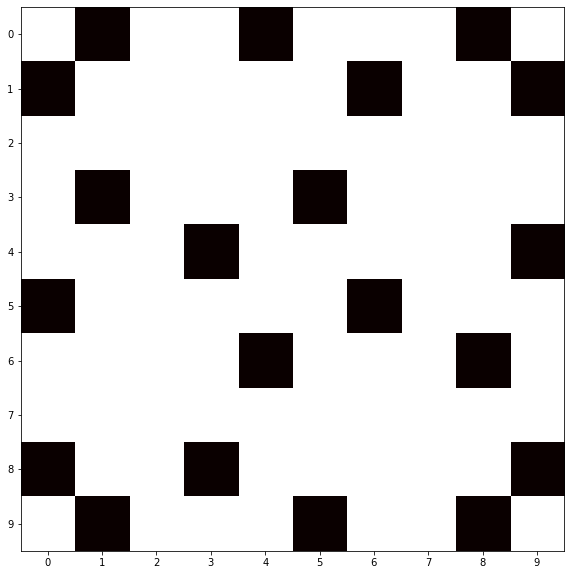

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
plt.imshow(zero_mask, cmap='hot_r', interpolation='nearest')
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

In [7]:
def random_empty_start():
    """
        A random board, with 3 symbols added.
        
        The mask should always allow symbols to be added.
    """
    valid_moves_first_80 = [1] + [2] + [3] + [4] * 77
    np.random.shuffle(valid_moves_first_80)
    
    global zero_mask
    mask_location = np.where( zero_mask.reshape(100) == 0 )
    
    valid_points = mask_location
    random_board = np.zeros(shape=(100))
    random_board[valid_points] = valid_moves_first_80

    return random_board

In [8]:
%matplotlib inline

def draw_board(board):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(10,10))
    plt.imshow( board.reshape((10,10)), cmap='hot', interpolation='nearest')

    for symbol,marker in zip([1,2,3],["X","o","P"]):
        X = np.where(board.reshape(10,10) == symbol)[0]
        Y = np.where(board.reshape(10,10) == symbol)[1]

        plt.scatter(Y,X, marker=marker,s=500)
    plt.show()

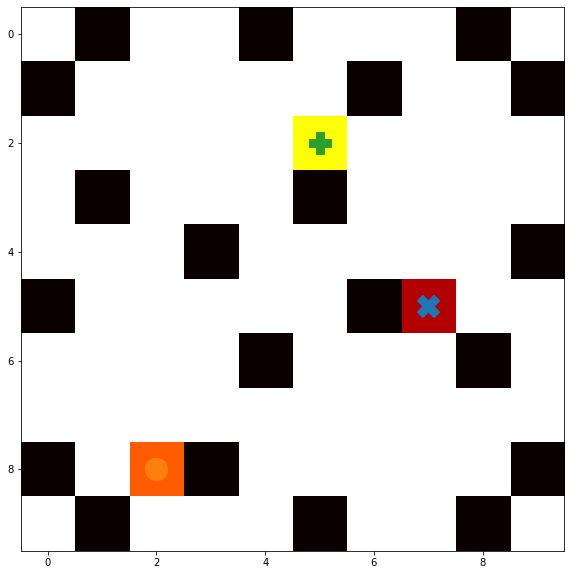

In [9]:
draw_board(random_empty_start())

In [10]:
def check_for_winners(board, return_violation_locations = False):
    """
        With help of convolutions, calculate violations
    
    """

    values = board.astype(int)
    n_values = int( np.max(values) + 1 )
    
    feature_planes = [np.eye(n_values)[values][:,1] ,np.eye(n_values)[values][:,2] ,np.eye(n_values)[values][:,3] ]
    
    diag_N = np.array([[ 1, 0, 0,],
                      [ 0, 1, 0,],
                      [ 0, 0, 1,]])

    diag_Z = np.array([[ 0, 0, 1,],
                      [ 0, 1, 0,],
                      [ 1, 0, 0,]])
    
    horizontal = np.array([[ 1, 1, 1,]])
    
    vertical = np.array([[ 1],
                   [ 1],
                   [ 1]])
    
    kernels = [diag_N, diag_Z, vertical, horizontal]
    
    violations = 0
    
    violation_locations = np.zeros(100)
    
    """
        For each symbol, check if symbol can win
    """
    
    for symbol in [1,2,3]:
        what_if_board = board.copy()
        what_if_board = what_if_board.astype(int)
        what_if_board[ what_if_board == 0] = symbol
        
        values = what_if_board.astype(int)
        n_values = int( np.max(values) + 1 )

        feature_planes = [np.eye(n_values)[values][:,1] ,np.eye(n_values)[values][:,2] ,np.eye(n_values)[values][:,3] ]

        
        for kernel in kernels:
            for plane in feature_planes:
                n_in_a_row = signal.convolve2d(plane.reshape(10,10), kernel, boundary='fill', mode='same')

                if np.max(n_in_a_row) == 3:
                    violation_locations += 1 * (n_in_a_row.reshape(100)==3)
                    violation_indices = np.where( n_in_a_row.reshape(100)==3 )
                    
                    for vio_index in violation_indices:
                        
                        if kernel is diag_N:
                            violation_locations[ vio_index - 11 ] += 1
                            violation_locations[ vio_index + 11 ] += 1
                        
                        if kernel is diag_Z:
                            violation_locations[ vio_index - 9 ] += 1
                            violation_locations[ vio_index + 9 ] += 1
                                                
                        if kernel is vertical:
                            violation_locations[ vio_index - 10 ] += 1
                            violation_locations[ vio_index + 10 ] += 1
                        
                        if kernel is horizontal:
                            violation_locations[ vio_index - 1 ] += 1
                            violation_locations[ vio_index + 1 ] += 1
                                                                            
    violation_locations = np.clip(violation_locations,0,1)
    violations = np.sum(violation_locations)
    
    if return_violation_locations:
        return violations, violation_locations
    return violations
    

In [11]:
def number_of_empty_spots(board):
    return np.sum(board==4)

In [12]:
"""
    Guide the objective function, by 'pushing' violations to the edge, 
    where they are easier to solve.

"""

penalty_mask = np.array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                   [1., 4., 4., 4., 4., 4., 4., 4., 4., 1.],
                   [1., 4., 8., 8., 8., 8., 8., 8., 4., 1.],
                   [1., 4., 8., 16., 16., 16., 16., 8., 4., 1.],
                   [1., 4., 8., 16., 32., 32., 16., 8., 4., 1.],
                   [1., 4., 8., 16., 32., 32., 16., 8., 4., 1.],
                   [1., 4., 8., 16., 16., 16., 16., 8., 4., 1.],
                   [1., 4., 8., 8., 8., 8., 8., 8., 4., 1.],
                   [1., 4., 4., 4., 4., 4., 4., 4., 4., 1.],
                   [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

def wieghted_number_of_empty_spots(board):
    global penalty_mask
    return np.sum( (board.reshape(10,10)==4) * penalty_mask )

In [13]:
def add_random_color(board):
    new_board = board.copy()
    empty_spots = np.where(new_board == 4)[0]
    
    if len(empty_spots) > 0:
        random_empty = np.random.choice(empty_spots)
        new_board[random_empty] = np.random.choice([1,2,3])
    
    return remove_violations(new_board)

In [14]:
def remove_violations(board):
    new_board = board.copy()
    violation_locations = check_for_winners(new_board, return_violation_locations=True)[1]
    violation_index = np.where(violation_locations == 1)[0]
    
    global zero_mask
    valid_locations = np.where( zero_mask.reshape(100) == 0 )[0]
    
    masked_violations =  list( set(violation_index).intersection(set(valid_locations)) )
    
    while masked_violations:
        random_vio_index = np.random.choice(masked_violations)
        new_board[random_vio_index] = 4
        
        violation_locations = check_for_winners(new_board, return_violation_locations=True)[1]
        violation_index = np.where(violation_locations == 1)[0]

        valid_locations = np.where( zero_mask.reshape(100) == 0 )[0]
        masked_violations =  list( set(violation_index).intersection(set(valid_locations)) )
    
    return new_board
    

In [15]:
def add_color_and_fix(board):
    new_board = board.copy()
    new_board = add_random_color(new_board)
    new_board = remove_violations(new_board)
    new_board = repeat_add(new_board)
    return new_board

In [16]:
def bomb_and_fix(board):
    new_board = removal_bomb(board)
    return repeat_add(new_board)

In [17]:
def removal_bomb(board, radius = 2):
    new_board = board.copy()
    
    if np.random.random() < .4 :
        radius = 1
    
    deltas = [-1, -2, -8, -9, -10, -11, -12, -18, -19, -20, -21, -22 ]
    if radius == 1:
        deltas = [-1, -9, -10, -11 ]
    
    deltas = np.concatenate([deltas, np.abs(deltas)])

    mask_list = []
    
    if np.sum( board == 4 ) > 0:
        random_zero = np.random.choice( np.where(board == 4)[0] )

        targets = random_zero + deltas
        targets = np.clip(targets, 0,99)

        list_of_targets = list(targets)

        global zero_mask

        valid_locations = np.where( zero_mask.reshape(100) == 0 )[0]

        vio_valid = set(list_of_targets).intersection(set(valid_locations))
        list_of_targets = list(vio_valid)

        if np.sum(board == 4) > 0:


            while list_of_targets:
                random_place = list_of_targets.pop()
                new_board[random_place] = 4
        
    return new_board
    

In [18]:
def repeat_add(board):
    mask = list( np.where( board == 4 )[0] )
    return add_random_none_violating_color_helper_repeat(board, mask)

def add_random_none_violating_color_helper_repeat( board, mask ):
    board_attempt = board.copy() 
    np.random.shuffle(mask)
    
    while mask:
        random_index = mask.pop()
        #print(random_index)
        
        colors_to_try = [1,2,3]
        np.random.shuffle(colors_to_try)
        #print(colors_to_try)
        
        FOUND_MATCH = False
        while colors_to_try:
            color_to_try = colors_to_try.pop()
            board_attempt[random_index] = color_to_try
            #print(board_attempt)
            
            if check_for_winners(board_attempt) < 1:
                FOUND_MATCH = True
                colors_to_try = []
                
        if not FOUND_MATCH:
            board_attempt[random_index] = 4
    """All tried"""
    
    return board_attempt

## Simulated Annealing Scheme in Python



In [19]:
!pip install frigidum --upgrade

Requirement already up-to-date: frigidum in /usr/local/lib/python3.6/dist-packages (0.1.9)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
import frigidum

In [21]:
local_opt = frigidum.sa(random_start=random_empty_start, 
                        objective_function=wieghted_number_of_empty_spots, 
                        neighbours=[bomb_and_fix, add_color_and_fix], 
                        T_start=5, 
                        T_stop = 0.1, 
                        alpha=0.95, 
                        repeats=50)



T: 0.096, M: 0.00, C_min:  0.0000, C_current:  0.0000: 100%|██████████| 77/77 [00:52<00:00,  1.47cooling/s] 

---
Best Found Cost: 0.00000000


In [22]:
np.unique(local_opt[0], return_counts=True)


(array([0., 1., 2., 3.]), array([20, 29, 26, 25]))

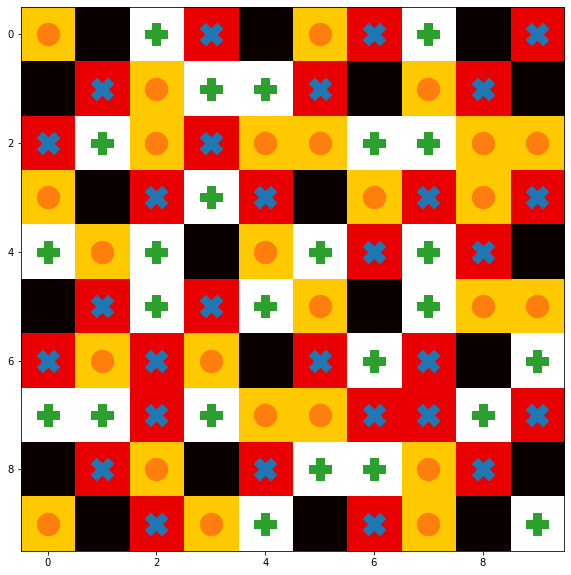

In [23]:
draw_board(local_opt[0])

In [24]:
def reorder_symbols(board):
    new_board = board.copy()
    
    counts = np.unique(board, return_counts=True)[1]
    symbols = list( np.argsort(10-counts) )
    for symbol,new_symbol in zip( symbols[:3],[1,2,3] ):
        new_board[ new_board==symbol] = new_symbol + 5
        
    for symbol in [6,7,8]:
        new_board[ new_board==symbol] = symbol - 5
    
    return new_board
    

In [25]:
solution = reorder_symbols(local_opt[0])

In [26]:
np.unique(solution, return_counts=True)


(array([0., 1., 2., 3.]), array([20, 29, 26, 25]))

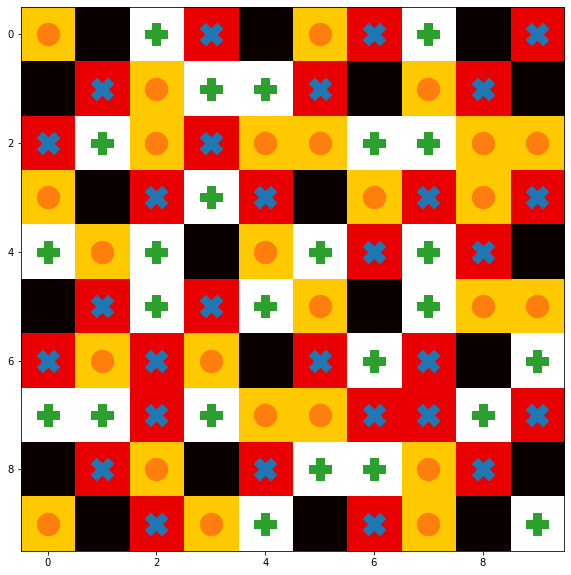

In [27]:
draw_board(solution)

In [28]:
check_for_winners(solution)

0.0

In [29]:
def print_solution(board):
    printed_solution = board.copy()
    symbols = ['.', 'X', 'O', '+' ]
    
    symbol_dict = { k:v for v,k in zip(symbols, [0,1,2,3]) }
    
    printed_solution = list(printed_solution)
    
    printed_solution = [symbol_dict[int(k)] for k in printed_solution ]
    
    print("=== SOLUTION AS LIST OF 100:  ===\n")
    print(printed_solution)
    
    print("\n=== SOLUTION AS 10x10 LISTS:  ===\n")
    first = "["
    for d in range(10):
        start = d * 10
        end = d*10 + 10
        if d < 9:
            print( "{}{}, ".format( first, printed_solution[start:end]))
        else:
            print( " {}] ".format( printed_solution[start:end]))
        first = " "
    
    print("\n=== SYMBOL COUNT:             ===\n")
    for symbol,key in zip( ['X', 'O', '+'], [1,2,3]):
        print( "There are {} {}'s".format(np.sum(board == key),symbol ))

In [30]:
print_solution(solution)

=== SOLUTION AS LIST OF 100:  ===

['O', '.', '+', 'X', '.', 'O', 'X', '+', '.', 'X', '.', 'X', 'O', '+', '+', 'X', '.', 'O', 'X', '.', 'X', '+', 'O', 'X', 'O', 'O', '+', '+', 'O', 'O', 'O', '.', 'X', '+', 'X', '.', 'O', 'X', 'O', 'X', '+', 'O', '+', '.', 'O', '+', 'X', '+', 'X', '.', '.', 'X', '+', 'X', '+', 'O', '.', '+', 'O', 'O', 'X', 'O', 'X', 'O', '.', 'X', '+', 'X', '.', '+', '+', '+', 'X', '+', 'O', 'O', 'X', 'X', '+', 'X', '.', 'X', 'O', '.', 'X', '+', '+', 'O', 'X', '.', 'O', '.', 'X', 'O', '+', '.', 'X', 'O', '.', '+']

=== SOLUTION AS 10x10 LISTS:  ===

[['O', '.', '+', 'X', '.', 'O', 'X', '+', '.', 'X'], 
 ['.', 'X', 'O', '+', '+', 'X', '.', 'O', 'X', '.'], 
 ['X', '+', 'O', 'X', 'O', 'O', '+', '+', 'O', 'O'], 
 ['O', '.', 'X', '+', 'X', '.', 'O', 'X', 'O', 'X'], 
 ['+', 'O', '+', '.', 'O', '+', 'X', '+', 'X', '.'], 
 ['.', 'X', '+', 'X', '+', 'O', '.', '+', 'O', 'O'], 
 ['X', 'O', 'X', 'O', '.', 'X', '+', 'X', '.', '+'], 
 ['+', '+', 'X', '+', 'O', 'O', 'X', 'X', '+', 'X'